## Objective
This notebook performs exploratory data analysis (EDA) on the cleaned credit card
dataset to understand customer behavior patterns, variable distributions, and
relationships between features. The insights from this analysis will guide
feature selection for customer segmentation.


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/processed/customer_clean.csv")

In [12]:
num_cols = df.select_dtypes(include="number").columns

df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8800.0,1561.089674,2077.468363,0.000000,127.967874,871.118798,2052.604607,19043.13856
BALANCE_FREQUENCY,8800.0,0.877560,0.236581,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8800.0,1000.908906,2136.501506,0.000000,40.097500,364.465000,1107.055000,49039.57000
ONEOFF_PURCHASES,8800.0,590.215619,1659.759741,0.000000,0.000000,38.200000,574.357500,40761.25000
INSTALLMENTS_PURCHASES,8800.0,410.998585,901.828890,0.000000,0.000000,89.640000,469.035000,22500.00000
CASH_ADVANCE,8800.0,974.752558,2092.658006,0.000000,0.000000,0.000000,1108.030788,47137.21176
PURCHASES_FREQUENCY,8800.0,0.491002,0.401388,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8800.0,0.202575,0.298517,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8800.0,0.364745,0.397566,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8800.0,0.134702,0.199689,0.000000,0.000000,0.000000,0.222222,1.50000


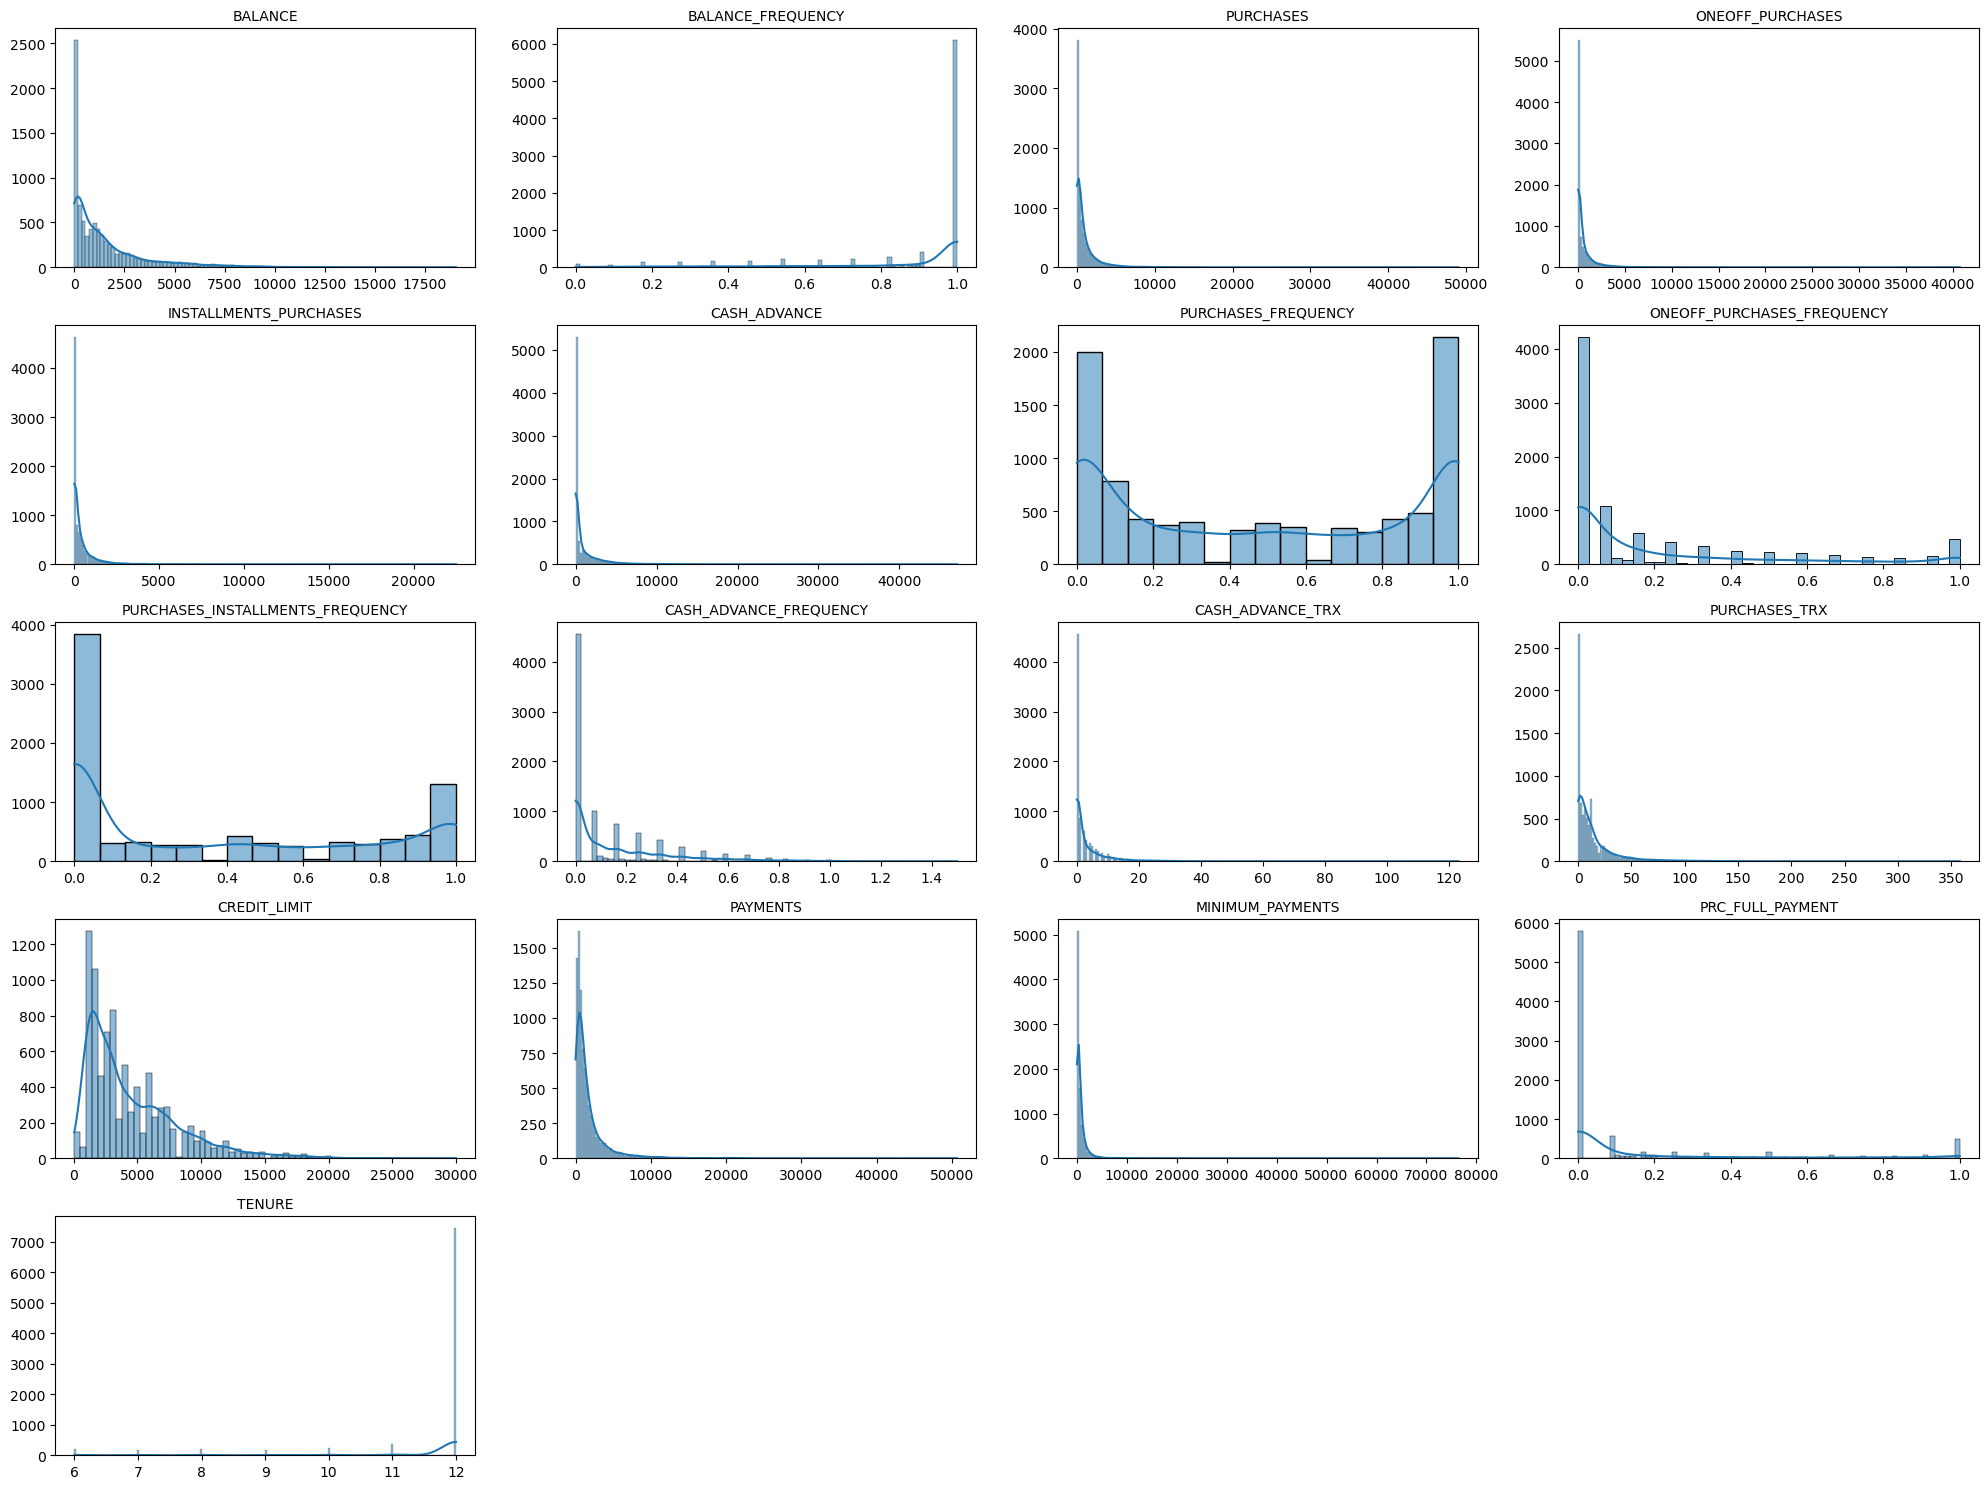

In [13]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = df.select_dtypes(include="number").columns

n_cols = 4  
n_rows = math.ceil(len(num_cols) / n_cols)

plt.figure(figsize=(5 * n_cols, 3 * n_rows))

for i, col in enumerate(num_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(col, fontsize=10)
    plt.xlabel("")
    plt.ylabel("")

plt.tight_layout()
plt.show()


### Distribution Analysis Summary

The distribution analysis reveals strong heterogeneity in customer behavior.
Most monetary variables are heavily right-skewed, indicating that a small group
of customers accounts for a disproportionately large share of balances and spending.
Frequency-based variables exhibit polarized patterns, with customers clustering
around very low or very high usage levels.

Cash advance variables show that while most customers rarely use this feature,
a distinct subgroup relies heavily on cash advances, suggesting a fundamentally
different usage behavior. Additionally, the full payment ratio highlights the
presence of financially disciplined customers who consistently pay their balances
in full.

Overall, these patterns confirm that the customer base is not homogeneous and
strongly support the use of customer segmentation.

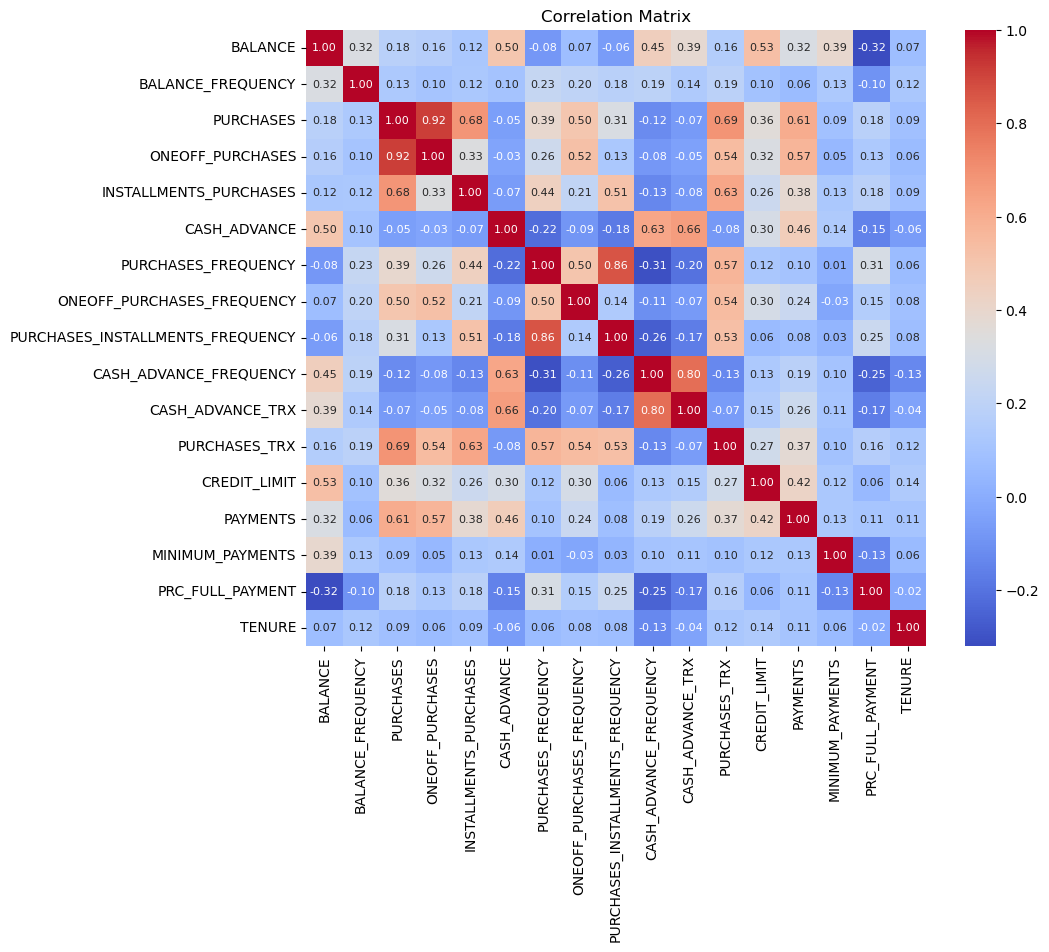

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(
    df[num_cols].corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    annot_kws={"size": 8}  
)
plt.title("Correlation Matrix", fontsize=12)
plt.show()


## Feature Grouping Based on Correlation Analysis

To reduce redundancy and improve interpretability in customer segmentation,
features are grouped based on their correlation structure and behavioral meaning.
From each group, representative variables are selected.

---

### 1. Purchase Amount & Transaction Volume

**Highly correlated features:**
- `PURCHASES`
- `ONEOFF_PURCHASES` (correlation ≈ 0.92 with `PURCHASES`)
- `INSTALLMENTS_PURCHASES`
- `PURCHASES_TRX` (correlation ≈ 0.69 with `PURCHASES`)

These variables all describe overall spending intensity and transaction volume.

**Decision:**
- Keep: `PURCHASES`
- Remove: `ONEOFF_PURCHASES`, `INSTALLMENTS_PURCHASES`, `PURCHASES_TRX`

**Rationale:**
`PURCHASES` provides an aggregated and comprehensive measure of customer spending
and captures most of the information contained in transaction-level variables.

---

### 2. Purchase Frequency (Usage Pattern)

**Highly correlated features:**
- `PURCHASES_FREQUENCY`
- `PURCHASES_INSTALLMENTS_FREQUENCY` (correlation ≈ 0.86)
- `ONEOFF_PURCHASES_FREQUENCY`

These variables reflect how frequently customers use their credit cards.

**Decision:**
- Keep: `PURCHASES_FREQUENCY`
- Remove: other purchase frequency variants

---

### 3. Cash Advance Behavior

**Highly correlated features:**
- `CASH_ADVANCE`
- `CASH_ADVANCE_FREQUENCY` (correlation ≈ 0.63)
- `CASH_ADVANCE_TRX` (correlation ≈ 0.66)

Cash advance usage represents a behavioral dimension distinct from standard
purchase activity.

**Decision:**
- Keep: `CASH_ADVANCE`
- Remove: `CASH_ADVANCE_FREQUENCY`, `CASH_ADVANCE_TRX`

---

### 4. Balance & Credit Capacity

Correlation analysis shows moderate relationships:
- `BALANCE` ↔ `CREDIT_LIMIT` (correlation ≈ 0.53)
- `BALANCE` ↔ `PAYMENTS` (correlation ≈ 0.39)

These variables describe account scale and credit utilization rather than
redundant behavior.

**Decision:**
- Keep: `BALANCE` (outstanding balance / usage intensity)
- Keep: `CREDIT_LIMIT` (credit capacity / customer tier)

---

### 5. Payment Behavior & Financial Discipline

**Key feature:**
- `PRC_FULL_PAYMENT`

This variable shows weak or negative correlation with most spending variables
(e.g. correlation ≈ -0.32 with `BALANCE`), indicating that it captures a
distinct aspect of customer behavior related to financial discipline and risk.

**Decision:**
- Keep: `PRC_FULL_PAYMENT`

---

### 6. Explicitly Excluded Features

The following features are excluded from segmentation due to limited
discriminatory power or redundancy:

- `TENURE`: Near-zero variance across customers
- `BALANCE_FREQUENCY`: Limited contribution to behavioral differentiation
- `MINIMUM_PAYMENTS`: Highly overlapping with `BALANCE`
- Multiple `*_FREQUENCY` and `*_TRX` variables: Redundant information


In [15]:
final_features = [
    "BALANCE",
    "PURCHASES",
    "PURCHASES_FREQUENCY",
    "CASH_ADVANCE",
    "CREDIT_LIMIT",
    "PRC_FULL_PAYMENT"
]


### Feature Selection for Segmentation

Based on correlation analysis and behavioral interpretation, a reduced
set of representative features was selected for clustering. This approach
avoids redundancy while preserving key dimensions of customer behavior,
including spending intensity, usage frequency, cash advance reliance,
account scale, and payment discipline.
